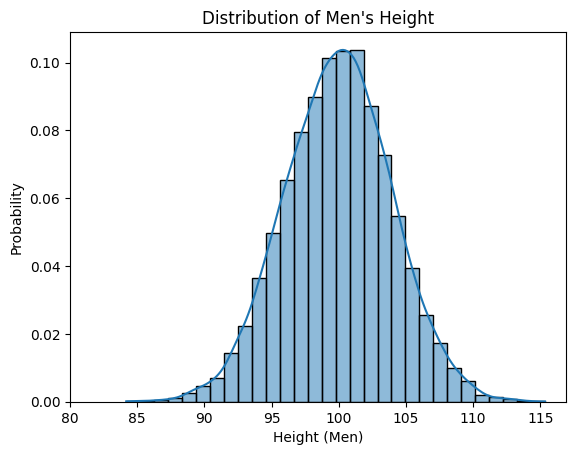

In [1]:
import matplotlib.pyplot as plt  # Importing the Matplotlib library for plotting
import seaborn as sns            # Importing the Seaborn library for enhanced data visualization
import numpy as np               # Importing NumPy for numerical operations

mu, sigma = 100, 4               # Defining the mean (mu) and standard deviation (sigma) for the normal distribution
data = np.random.normal(mu, sigma, 10000)  # Generating 10,000 random samples from a normal distribution

# Creating a histogram with a kernel density estimate (KDE) overlay
sns.histplot(data, bins=30, kde=True, stat='probability')  
plt.xlabel('Height (Men)')      # Labeling the x-axis as 'Height (Men)'
plt.ylabel('Probability')        # Labeling the y-axis as 'Probability'
plt.title("Distribution of Men's Height")  # Setting the title of the plot
plt.xticks(range(80, 120, 5))   # Setting the x-ticks to range from 80 to 120 with a step of 5
plt.show()                       # Displaying the plot


Percentage of data within one standard deviation: 68.22
Percentage of data within two standard deviation: 95.53
Percentage of data within three standard deviation: 99.78


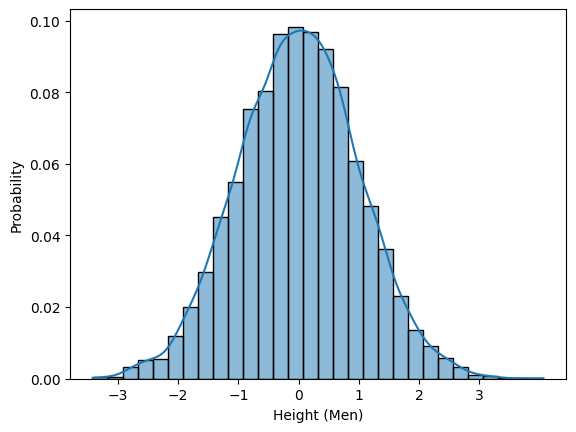

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Generating normally distributed data for Height of Men
mu, sigma = 100,4
data = np.random.normal(mu, sigma, 10000)

#Finding the z-score for every value in the data
data = (data - mu)/sigma

#Proving the empirical rule
one_sd = len(data[(data>-1) & (data<1)])/len(data)*100
two_sd = len(data[(data>-2) & (data<2)])/len(data)*100
three_sd = len(data[(data>-3) & (data<3)])/len(data)*100

print('Percentage of data within one standard deviation:', round(one_sd,2))
print('Percentage of data within two standard deviation:', round(two_sd,2))
print('Percentage of data within three standard deviation:', round(three_sd,2))

#Plotting the z-scores
sns.histplot(data, bins=30, kde=True, stat='probability')
plt.xlabel('Height (Men)')
plt.ylabel('Probability')
plt.xticks(range(-3,4,1))
plt.show()

In [6]:
from scipy.stats import norm

mu = 100
sigma = 4

# Change the value to something closer to the mean
x = 110  # New value

# Find the z-score
z = (x - mu) / sigma

# Find the probability (area under the curve until x)
p = norm.cdf(z)

# Print the result
print('Percentage of men shorter than', x, 'cm:', round(p * 100, 2))

Percentage of men shorter than 110 cm: 99.38


In [4]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 10.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
#Find the z-score
z = (100-mu)/sigma

#Find the probability (1 - area under the curve until 177 cm)
p = 1 - norm.cdf(z)

print('Percentage of men taller than 100 cm:', round(p*100,2))

Percentage of men taller than 100 cm: 50.0


In [8]:
#Find the z-score for 80th percentile
z = norm.ppf(0.85) #percent point function, gives percentile
x = (z*sigma) + mu #find the value using z-score formula

print("The height for which 85% men are shorter:", round(x,2))

The height for which 85% men are shorter: 104.15


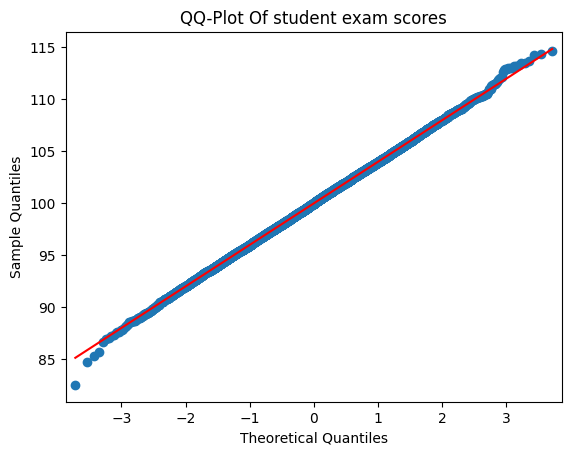

In [11]:
#QQPlot

import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

#Generating normally distributed data for height of men
mu, sigma = 100, 4
data = np.random.normal(mu, sigma, 10000)

#QQPlot
fig = sm.qqplot(data, line='s')
plt.title('QQ-Plot Of student exam scores')
plt.show()

In [10]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 5.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
from scipy.stats import norm
from scipy.stats import shapiro, kstest

# Generating normally distributed data for height of men
mu, sigma = 100, 4
data = np.random.normal(mu, sigma, 10000)

# H0: Data is Gaussian
# Ha: Data is not Gaussian

# Shapiro Test for Normality
test_stat, p_value = shapiro(data)

print('Result of Shapiro Test:')
if p_value < 0.05:
    print('Reject H0')
    print('Data is not Gaussian')
else:
    print('Fail to reject H0')
    print('Data is Gaussian')

# Kolmogorov-Smirnov Test for Normality
# Specify the mean and std for the normal distribution
test_stat, p_value = kstest(data, 'norm', args=(mu, sigma))

print('-' * 20, '\nResult of KS Test:')
if p_value < 0.05:
    print('Reject H0')
    print('Data is not Gaussian')
else:
    print('Fail to reject H0')
    print('Data is Gaussian')


Result of Shapiro Test:
Fail to reject H0
Data is Gaussian
-------------------- 
Result of KS Test:
Fail to reject H0
Data is Gaussian


/Users/pranavashokdivekar/this_mac/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)
